<a href="https://colab.research.google.com/github/pamod21/SpamMailDetection/blob/main/Machine_Learning_based_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from wordcloud.wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
stopwords.words('english')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
#reading the data in csv
df = pd.read_csv('/content/mail_DataSet.csv', encoding='latin-1')

In [78]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [79]:
df.shape

(5572, 5)

In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [81]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1735,ham,Why tired what special there you had,NaN,NaN,NaN
1673,spam,Monthly password for wap. mobsi.com is 391784....,NaN,NaN,NaN
3345,ham,U're welcome... Caught u using broken english ...,NaN,NaN,NaN


In [82]:
df.drop(['Unnamed: 2'],axis= 1,inplace = True)

In [83]:
df.drop(['Unnamed: 3'],axis= 1,inplace = True)
df.drop(['Unnamed: 4'],axis= 1,inplace = True)

In [84]:
df.shape

(5572, 2)

In [85]:
df.rename(columns = {'v1':'target'}, inplace = True)

In [86]:
df.rename(columns = {'v2':'text'}, inplace = True)

In [87]:
df.rename(columns={'message ':'text'},inplace=True)
df.sample(5)

,target,text
4632,ham,Oh wow thats gay. Will firmware update help
1080,ham,You tell what happen dont behave like this to ...
4466,ham,"She said,'' do u mind if I go into the bedroom..."
5490,ham,K. I will sent it again
1771,ham,Watching tv now. I got new job :)


In [88]:
df.rename(columns={'Message':'text'},inplace=True)

In [89]:
df.rename(columns={'Category':'target'},inplace=True)

In [90]:
#label encoder wihtout using the encoder
df.loc[df['target'] == 'spam', 'target',] = 0
df.loc[df['target'] == 'ham', 'target',] = 1

In [91]:
df.sample(5)

,target,text
5485,1,Also fuck you and your family for going to rho...
5291,1,Xy trying smth now. U eat already? We havent...
3157,1,Thank u. IT BETTER WORK OUT CAUSE I WILL FEEL ...
189,1,I jus reached home. I go bathe first. But my s...
1290,1,Eat jap done oso aft ur lect wat... ÌÏ got lec...


In [92]:
df.head(6)

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
5,0,FreeMsg Hey there darling it's been 3 week's n...


In [93]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [94]:
#duplicates number printing
df.duplicated().sum()

403

In [95]:
#droping the duplicates
df = df.drop_duplicates(keep='first')

In [96]:
df.shape

(5169, 2)

In [97]:
#spam ham count
df['target'].value_counts()

1    4516
0     653
Name: target, dtype: int64

In [98]:
import nltk
!pip install nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
df.head(5)

,target,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
df['char_count']=df['text'].apply(len)

In [101]:
df.head(5)

,target,text,char_count
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [102]:
df['word_count']= df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [103]:
df.head()

,target,text,char_count,word_count
0,1,"Go until jurong point, crazy.. Available only ...",111,24
1,1,Ok lar... Joking wif u oni...,29,8
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,1,U dun say so early hor... U c already then say...,49,13
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15


In [104]:
df['sent_count']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [105]:
df.head()

,target,text,char_count,word_count,sent_count
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [106]:
df[['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [107]:
#ham messages
df[df['target']==1][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [108]:
#spam messages
df[df['target']==0][['char_count','word_count','sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [109]:
def transform_text(text):
  #lower case 
  text = text.lower()
  #tokenization
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  #punctuation and stopwords removal
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation :
      y.append(i)
  #stemming
  text = y[:]
  y.clear()
  for i in text :
    y.append(ps.stem(i))

  return " ".join(y)

In [110]:
#transform_text checking
transform_text('my name is demon of the hidden mist')

'name demon hidden mist'

In [111]:
#tranformed words
df['transformed_text']=df['text'].apply(transform_text)

In [112]:
df.head()

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


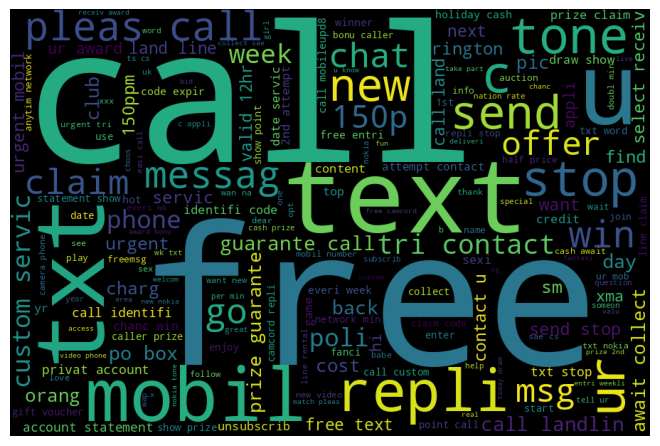

In [113]:
#word cloud generation for the spam 
from wordcloud import WordCloud
wc = WordCloud(width=900,height=600,min_font_size=10,background_color='black').generate(" ".join(df[df['target']==0]['transformed_text'].astype(str)))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

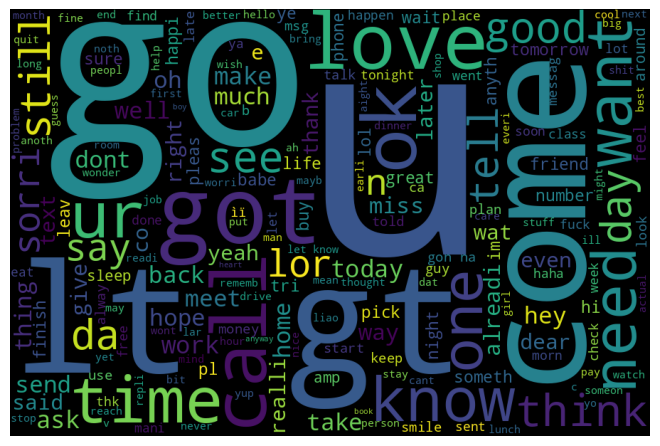

In [114]:
#word cloud generation for the ham 
wc1 = WordCloud(width=900,height=600,min_font_size=10,background_color='black').generate(" ".join(df[df['target']==1]['transformed_text'].astype(str)))
plt.imshow(wc1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [115]:
df.head()

,target,text,char_count,word_count,sent_count,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [116]:
#most common words in spam
spam_corpus= [] #empty list
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [117]:
len(spam_corpus)#length of spam words

9939

In [118]:
#counter of all words in spam
(Counter(spam_corpus).most_common(10))

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [119]:
#most common words in ham
ham_corpus= [] #empty list
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [120]:
len(ham_corpus)#length of ham words

35404

In [121]:
#counter of all words in ham
(Counter(ham_corpus).most_common(10))

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

**ALGORITHMS USED ARE:**

GaussianNB

MultinomialNB

BernoulliNB

LogisticRegression

RandomForestClassifier

SVM


In [122]:
#vectorized as bag of words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [123]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [124]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
#scalling the dataframe using minmaxscaler (transforming all the features to have the same scale)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

In [126]:
X.shape

(5169, 3000)

In [127]:
y = df['target'].values

In [128]:
y=y.astype('int') #array is recognised as object so it is converted to int array


In [129]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=2) 

In [132]:
#importing all the algorithms
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [133]:
#creating objects for the algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lg = LogisticRegression()
rfc = RandomForestClassifier()
svc= SVC()
clfs = {
          'gaussianNB': gnb,
          'multinomialNB': mnb,
          'bernoulliNB': bnb,
          'legistic regression':lg,
          'randomforest':rfc,
          'supportvectorMachine':svc
    
        }

In [134]:
#gaussian naive bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8755641521598968
0.9771054783319706


In [135]:
#multinomial naive bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9800128949065119
0.9832727272727273


In [136]:
#bernoulli naive bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9819471308833011
0.9812138728323699


In [137]:
#Logistic regression
lg.fit(X_train,y_train)
y_pred4 = lg.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9729206963249516
0.9713876967095851


In [138]:
#random forest
rfc.fit(X_train,y_train)
y_pred5 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9780786589297228
0.9769784172661871


In [139]:
#support vector machine
svc.fit(X_train,y_train)
y_pred8 = svc.predict(X_test)
print(accuracy_score(y_test,y_pred8))
print(precision_score(y_test,y_pred8))

0.9780786589297228
0.9762931034482759


In [140]:
#creating a funtion that can train models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [141]:
accuracy_scores = [] #array of accuracy score
precision_scores = [] #array of precion score
#for loop to run and calculate precision and accuracy score of all the model
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy*100)
    print("Precision - ",current_precision*100)
    print("-----------")
    #appended and stored in the arrays
    accuracy_scores.append(current_accuracy*100)
    precision_scores.append(current_precision*100)

For  gaussianNB
Accuracy -  87.55641521598967
Precision -  97.71054783319705
-----------
For  multinomialNB
Accuracy -  98.00128949065119
Precision -  98.32727272727273
-----------
For  bernoulliNB
Accuracy -  98.1947130883301
Precision -  98.121387283237
-----------
For  legistic regression
Accuracy -  97.29206963249516
Precision -  97.13876967095851
-----------
For  randomforest
Accuracy -  97.678916827853
Precision -  97.62589928057554
-----------
For  supportvectorMachine
Accuracy -  97.80786589297227
Precision -  97.62931034482759
-----------


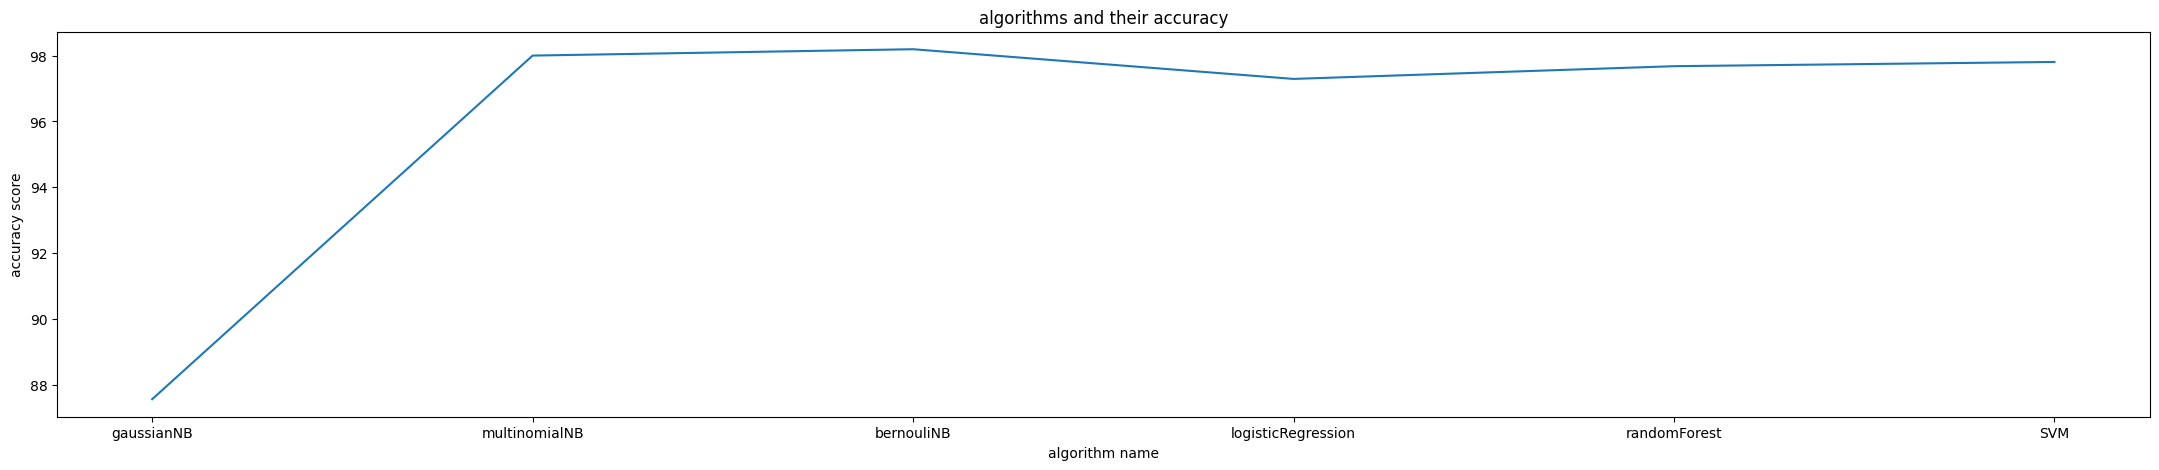

In [142]:
#creating graphs for accuracy of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','SVM']
plt.figure(figsize=(27,5))
plt.plot(x_axis,accuracy_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('accuracy score')

plt.show()

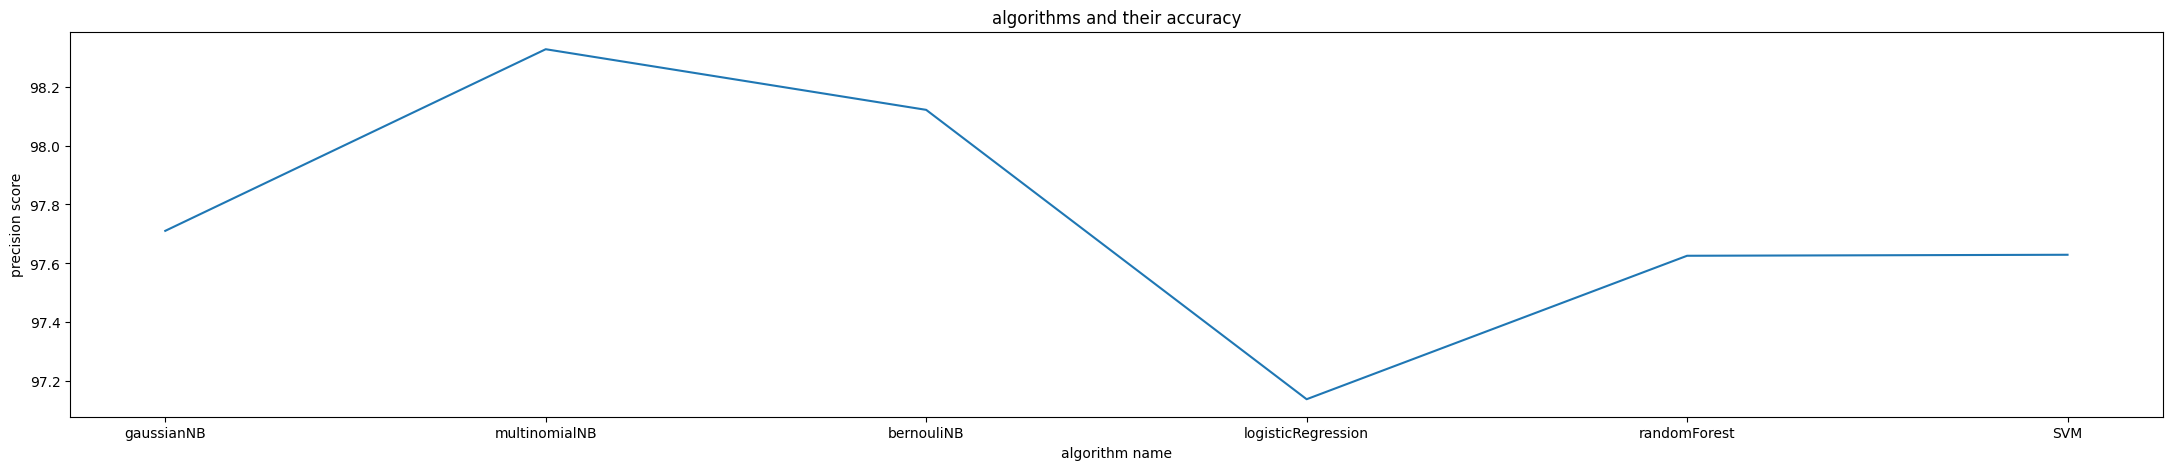

In [143]:
#creating graphs for precison of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','SVM']
plt.figure(figsize=(27,5))
plt.plot(x_axis,precision_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('precision score')
plt.show()

In [144]:
#creating a dataframe 
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [145]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [146]:
performance_df1

,Algorithm,variable,value
0,multinomialNB,Accuracy,98.001289
1,bernoulliNB,Accuracy,98.194713
2,gaussianNB,Accuracy,87.556415
3,supportvectorMachine,Accuracy,97.807866
4,randomforest,Accuracy,97.678917
5,legistic regression,Accuracy,97.292070
6,multinomialNB,Precision,98.327273
7,bernoulliNB,Precision,98.121387
8,gaussianNB,Precision,97.710548
9,supportvectorMachine,Precision,97.629310


As shown in the figures, Multinomial Naive Bayes has the highest combination of accuracy and precision.
And therefore it has the best chance of success.
Hence the final algorithm chosen is **Multinomial Naive Bayes**.

In [147]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
import gradio as gr

In [149]:
def hehe(text):
    x=transform_text(text)
    vect=tfidf.transform([x])
    result=mnb.predict(vect)
    if result == 0:
        div="spam"
    else:
        div="ham"
    return div

In [150]:
demo = gr.Interface(
    fn=hehe, 
    inputs=gr.Textbox(placeholder="Enter a email..."), 
    outputs="label", 
    
    examples=[["enter a email"]])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3b3c3dbb1fe010cba3.gradio.live

